# MIE1613 Project Experiment #1 - Single Run
Here I make sure the simulation is operating correctly by running a single instance using the input data

In [1]:
# Import Libraries
# Data
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import random

import re
from copy import deepcopy
#from tqdm import tqdm
import tqdm.notebook as tq

#Viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(font='Helvetica') # Futura? Calibri Light? 
sns.set_style("white")
sns.set_theme(style='ticks')
sns.set_context('talk')

c:\Users\Keagan Rankin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Keagan Rankin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Import
The simulation object and the required input data (emissions data and housing sample paths)

In [2]:
# Simulation object
from packages.project_package.mie_importer import *
from packages.project_package.mie_simulation import *

In [21]:
# Emissions data
Impr = MIEImporter()
Impr.factor_range = 'likely'
embodied_data, operational_data = Impr.import_emission_data()

# Housing sample paths: 6000 exist for each scenario.
starts_data = pd.read_csv('data/input_data/starts_samplepaths_bayesian_mg6.csv', index_col=0)

Importer created. Change self.factor_range for sensitivity analysis before importing.


In [28]:
starts_data.loc[:,'2023':'2050'].head()

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,227540.712511,229028.449488,230449.784185,231683.318568,232771.419736,233769.898195,234691.789975,235545.242594,236337.181445,237074.124542,...,242000.114555,242451.079734,242897.563778,243341.603565,243765.681932,244171.835756,244561.694542,244934.036162,245288.860617,245628.204785
1,234190.106867,235677.470315,237098.448153,238331.672830,239419.500805,240417.728573,241339.388891,242192.627232,242984.367249,243721.125320,...,248645.878552,249096.730506,249543.102450,249987.030751,250411.002643,250817.054493,251206.815396,251579.063532,251933.798899,252273.057868
2,227243.676362,228737.131858,230163.929838,231402.205643,232494.489222,233496.805602,234422.240921,235278.974016,236073.956898,236813.732635,...,241758.657020,242211.355605,242659.555830,243105.302405,243531.010831,243938.725817,244330.083130,244703.855946,245060.044264,245400.692793
3,227243.676362,228737.131858,230163.929838,231402.205643,232494.489222,233496.805602,234422.240921,235278.974016,236073.956898,236813.732635,...,241758.657020,242211.355605,242659.555830,243105.302405,243531.010831,243938.725817,244330.083130,244703.855946,245060.044264,245400.692793
4,220045.727238,221380.850518,222656.383136,223763.380204,224739.862756,225635.916195,226463.239301,227229.143811,227939.844702,228601.191365,...,233021.867899,233426.572573,233827.255792,234225.745489,234606.321429,234970.811547,235320.678190,235654.824596,235973.250768,236277.784637


## Simulate a single run
Create an instance of the simulation object

In [12]:
# init
Simr = MIESimulation()
Simr.e_data = embodied_data
Simr.o_data = operational_data

Sim object created. Initialize self.e_data and self.o_data


In [54]:
# simulate a single run
years = np.arange(2023, 2051)
starts_0 = starts_data.loc[0,'2023':'2050'].values.astype(int)
single_test = Simr.chain_periods_build_lmh(years, starts_0, verbose=False)

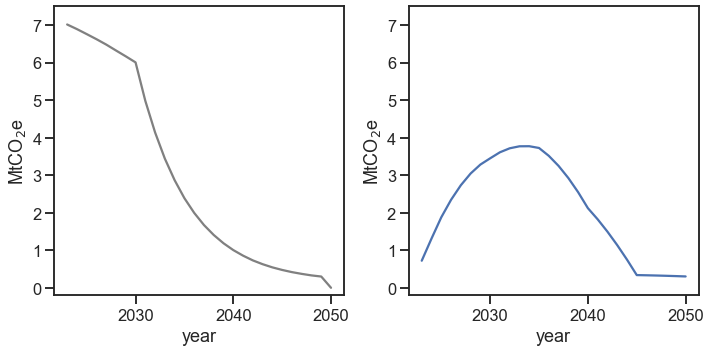

In [74]:
# plot yearly
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(years, np.array(single_test['E_e'])*1e-9, color='grey')
ax[1].plot(years, np.array(single_test['E_o'])*1e-9)

for a in ax.reshape(-1):
    a.set_ylim([-0.2,7.5])
    #a.hlines(0, 2020, 2055)
    a.set_xlabel('year')
    a.set_ylabel('MtCO$_2$e')

plt.tight_layout()

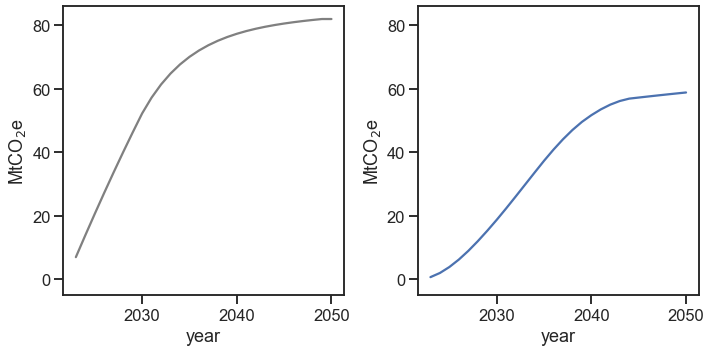

In [77]:
# plot cumulative
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(years, np.array(single_test['E_e']).cumsum()*1e-9, color='grey')
ax[1].plot(years, np.array(single_test['E_o']).cumsum()*1e-9)

for a in ax.reshape(-1):
    a.set_ylim([-5,86])
    #a.hlines(0, 2020, 2055)
    a.set_xlabel('year')
    a.set_ylabel('MtCO$_2$e')

plt.tight_layout()